# Computational Complexity and Sorting<span STYLE="color:blue">$^1$</span>
Computational complexity refers to the resources (for example time or memory) required by different algorithms. In this lab, you'll see how different algorithms can solve the same task, <span STYLE="color:red"> sorting</span>, with very different computational complexities. Unlike other problems we will explore in this school, sorting is interestingly a problem where quantum algorithms provide no generic speedup.

## In this lab, you'll learn:
* How three different sorting algorithms are implemented
* What Big O notation is, and how we can use it to compare the computational complexity of different algorithms

<span STYLE="color:blue">$^1$ This excerise is a barely modified version of the amazing tutorial of Santiago Valdrrama in ["Sorting Algorithms in Python"](https://realpython.com/sorting-algorithms-python/)</span>

<b>In order for this code to run properly, it is important that cells are executed in sequential order.</b>

# Preliminaries and function definitions

First, lets import some functions and modules for use as we go along. <span STYLE="color:red"> Everything in this section shouldn't need modification.</span>  The most important one for you might be <span STYLE="color:blue">randint</span>, so I'll define it here

<span STYLE="color:blue">randint</span>(a, b)


    Return a random integer N such that a <= N <= b. Alias for randrange(a, b+1).


In [1]:
from random import randint # (for sampling random integers)
from timeit import repeat #(for performing repeated timings)
import matplotlib.pyplot as plt #for plotting results
import numpy as np #for numerical tricks


To time your codes, I provided a function for you, <span STYLE="color:blue">run_sorting_algorithm</span>.  This function takes in the string name of a sorting algorithm, for example "Hanks_very_fast_sort" and a list "Hanks_important_numbers" via <span STYLE="color:blue">run_sorting_algorithm</span>("Hanks_very_fast_sort",Hanks_important_numbers, number_of_repeats, number_of_shots) and it will print out the minimum time taken to sort, obtained by taking "number_of_shots" measurements in batchs of "batchs". You don't need to worry how the inner workings of this function actually works. Just what it does.

In [2]:
def run_sorting_algorithm(sortlist,algorithm="sorted", batches=3,shots=10):

    # Set up the context and prepare the call to the specified
    # algorithm using the supplied list called list. Only import the
    # algorithm function if it's not the built-in `sorted()`.
    setup_code = f"from __main__ import {algorithm}" \
        if algorithm != "sorted" else ""

    stmt = f"{algorithm}({sortlist})"

    # Execute the code "number" different times in batchs of "repeat" and return the time
    # in seconds that each execution took where number and repeat are gotten from the variables passed in
    times = repeat(setup=setup_code, stmt=stmt, repeat=batches, number=shots)

    # Finally, display the name of the algorithm and the
    # minimum time it took to run

    print(f"Algorithm: {algorithm}. Minimum execution time: {min(times)} seconds")


Python, like all sensible languages, has a built-in sorting algorithm <span STYLE="color:blue">sorted</span> that many people have spent years optimizing.  Let's get you familar with <span STYLE="color:blue">run_sorting_algorithm</span> by testing it on <span STYLE="color:blue">sorted</span>.  To do this, in the next cell:
* <b>Define a variable</b> that stories the size of the list you would like to sort.  Set the size to be 10.
* <b>Define an list</b> of the size of the variable just defined which has each element randomly sampled from the integers 0 to 1000.  Hint: This is a good place to use <span STYLE="color:blue">randint</span>
* Call <span STYLE="color:blue">run_sorting_algorithm</span> with as inputs: algorithm=<span STYLE="color:blue">sorted</span>, the list you have created, batches=3, and shots=10

In [3]:
ARRAY_LENGTH=10

# Generate an array of `ARRAY_LENGTH` items consisting
# of random integer values between 0 and 999
array = [randint(0, 1000) for i in range(ARRAY_LENGTH)]

# Call the function using the name of the sorting algorithm
# and the array you just created
run_sorting_algorithm(array,"sorted",3,10)

Algorithm: sorted. Minimum execution time: 8.861000026172405e-06 seconds


Hopefully, your code eventually executed without errors, and you obtained a single line output that looks something like:

    Algorithm: sorted. Minimum execution time: 7.719267159700394e-06 seconds

Don't fret if you get a time different than 7.7 microseconds.  Runtime is depends upon your CPU, the amount of RAM you have, and what other applications are running.  For me, this was done on my five year old labtop while copious browser tabs, including youtube, zoom, and slack were open. It's for these reasons that <span STYLE="color:red">minimum executation time</span> is a better metric for your computer's speed than an average.  While an average will fluctuation wildly depending on what everything else on your computer is doing, the minimum should better reflect the optimal case for you.
  

* In the cell below, copy the code used to time <span STYLE="color:blue">sorted</span> and <b>retime for 3 different lists</b> of length 10.
* <b>Are the times the same? Do they differ?</b>

In [21]:
array = [randint(0, 1000) for i in range(ARRAY_LENGTH)]
run_sorting_algorithm(array,"sorted",3,10)

Algorithm: sorted. Minimum execution time: 7.604999836985371e-06 seconds


There is one more reason that your times can differ, which is important to computational complexity.  That is the list itself.  Consider the two lists:

    [1,2,3,4,5,6,7,8,9,10] & [989,452,223,1,653,545,594,823,129,210]

<b>Which one do you think should take longer to sort, and why?</b>

In general, the computational complexity of an algorithm cannot be described by a single number.  Instead, there are many different ones.  In the example of these two lists, you probably suspected that the first list, having smaller numbers that are already completely sorted, would be sorted by faster than the second list, which has numbers of differing sizes and is mixed up.  When a sorting algorithm can take advantage of such features, then instead of having a single, fixed computational complexity, it can have a <span STYLE="color:red">best-case scaling</span>, a <span STYLE="color:red">worse-case scaling</span>, and a so-called <span STYLE="color:red">average-case scaling</span> based on the typical list it is passed.

Since the actual runtime depends on many factors, it isn’t necessarily the best way to compare the complexity of different algorithms. Another option is to consider the theoretical runtime by use of <span STYLE="color:red">Big $O$ notation</span>. Big $O$ can also be used to compare different algorithms and decide which one is the most efficient.

# Measuring Efficiency With Big O Notation

Take $n$ as the size of the input to an algorithm, the Big $O$ notation represents the relationship between $n$ and the number of steps required to find a solution, while neglecting overall factors. Big $O$ uses a capital letter “O” followed by this relationship inside parentheses. For example, $O(n)$ represents algorithms that execute a number of steps proportional to the size of their input.

Here are five commonly occuring complexities:

--$O(1)$: The runtime is independent of input size. <b>This would be amazing to have! No matter how much data we throw at it, it takes the same time.</b>

--$O(n)$: The runtime grows linearly with the input. A function that looks at every item of a list would be $O(n)$.

--$O(n^2)$ The runtime is a quadratic function of the input. A simple code for finding pairs of values in a list that are identical is $O(n^2)$.

--$O(2^n)$ The runtime grows exponentially with input. These algorithms are considered extremely inefficient.  Many problems where the best known classical algorithms are $O(2^n)$ are <span STYLE="color:red">known to have quantum algorithms that are polynomial</span>.

--$O(\log n)$ The runtime grows linearly while the size of the input grows exponentially.

# Bogosort, or things one would never do

Just to demonstrate how chosing a bad algorithm can lead to different complexity, consider perhaps the silliest algorithm one could propose for sorting a list, randomly shuffling it until you get a sorted list. A helpful thing for translating your ideas into code is so-called pseudocode. Pseudocode is an artificial and informal language that helps programmers develop algorithms.  Pseudocode for <span STYLE="color:blue">bogosort</span> might look something like:

    while list is not SORTED:
    shuffle(list)

which a programmer would then translate into the specific language they hope to use.

The average runtime complexity of this algorithm is $O((n+1)!)$, worse than even the $O(2^n)$ we discussed above.

# The Bubble Sort Algorithm in Python

Its name comes from the way the algorithm works: With every new pass, the largest element in the list “bubbles up” toward its correct position.

Bubble sort consists of making multiple passes through a list, comparing elements one-by-one, and swapping adjacent items that are out of order. A small optimization is that at at the end of each bubble loop, you keep track of if any "bubblings" have been perfomed.  If none occur, that means the list is sorted and you can stop.

Translating these sentences into pseudocode (which won't run in python), we have:

    bubble_sort(list)
        integer n = length of list
        for i from 1 to n
            boolean already_sorted = TRUE
            for j from 1 to n-i-1
                if list[j] > list[j+1]
                    swap list[j] and list[j+1]
                    already_sorted = FALSE
            if already_sorted = TRUE
                break
        return list
        
In the next cell, try to write a python function called <span STYLE="color:blue">bubble_sort</span> which implements this pseudocode.
* Define a function  <span STYLE="color:blue">bubble_sort</span> which <b>takes in a list</b>, and <b>returns a sorted version</b>.  The body of this function should <b>follow the pseudcode</b> above
* To debug, it may prove useful to <b>print your list at each j-th step</b>, to compare to the example case below

In [17]:
def bubble_sort(arr):
  n = len(arr)
  for i in range(0, n):
    already_sorted = True
    for j in range(0, n-i-1):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j]
        already_sorted = False
    if already_sorted:
      break

  return arr

To test your code, I've included the following code for you with a preset list, such that you can debug <b>step-by-step</b>. Starting from the list \[8,2,6,4,5\], the steps of progression should be

    [2, 8, 6, 4, 5]
    
    [2, 6, 8, 4, 5]
    
    [2, 6, 4, 8, 5]
    
    [2, 6, 4, 5, 8]
    
    [2, 4, 6, 5, 8]
    
    [2, 4, 5, 6, 8]



In [41]:
# Generate an list of consisting five integers
arr = [4,3,2,4,10]

# Call the function using the name of the sorting algorithm
# and the list you just created
run_sorting_algorithm(arr,"bubble_sort",3,5)

Algorithm: bubble_sort. Minimum execution time: 2.0934000076522352e-05 seconds


# Measuring Bubble Sort’s Big O Runtime Complexity

When running the bubble sort, most of the time is spend making comparisons between elements of the list, and therefore the total time spend is roughly proportional to how many comparisons you perform. The bubble sort consists of two nested for loops in which the algorithm performs $n - 1$ comparisons, then $n - 2$ comparisons, and so on until the final comparison is done. This comes at a total of $\frac{1}{2}n^2 - \frac{1}{2}n$ comparisons.

Since numerical prefactors aren't important to Big O, and $n^2$ grows much faster than $n$ for large $n$ we are left with bubble sort having an average- and worst-case complexity of $O(n^2)$.

If for some weird reason, the algorithm receives an already-sorted list, the runtime complexity becomes $O(n)$ because the algorithm visit every element only once.

$O(n)$, then, is the best-case runtime complexity of bubble sort. But keep in mind that best cases are an exception, and you should focus on the average case when comparing different algorithms.


Now, lets run your <span STYLE="color:blue">bubble_sort</span> for some larger lists, to see if we can observe this behavior in the next cell:
* <b>Make a for loop</b> that increments a variable i from 1 to 3
* During the loop, <b>set list length variable to be $10^i$</b>
* <b>Create a list of the length $10^i$</b> whose elements are random integers between 0 and 1000
* Use <span STYLE="color:blue">run_sorting_algorithm</span> with 3 batches of 5 shots

In [26]:
for i in range(1, 5):
    # set a length of list variable dependent on i
    list_len = 10**i

    #create your list of length 10^i random integers
    rand_list = [randint(0,1000) for i in range(list_len)]
    run_sorting_algorithm(rand_list,"bubble_sort",3,5)
    #Call run_sorting_algorithm


Algorithm: bubble_sort. Minimum execution time: 9.209900008499972e-05 seconds
Algorithm: bubble_sort. Minimum execution time: 0.012984600999971008 seconds
Algorithm: bubble_sort. Minimum execution time: 0.47854593300007764 seconds
Algorithm: bubble_sort. Minimum execution time: 56.28169299499996 seconds


# Plotting your results

You should have obtained 4 times.

* <b>Putting them into the list "bubble_results" </b> in the cell below
* Running this cell will plot your times on a <b>log-log scale</b>
* By comparing to the lines drawn, can you extract an empircal value of the runtime complexity? (Hint: which line is closest to your data over the entire range)

When you plot your data, you will also observe four lines are being plotting on the log-log plot with different $n$ dependences. <b>Are the results in agreement with your theoretical expectations?</b>


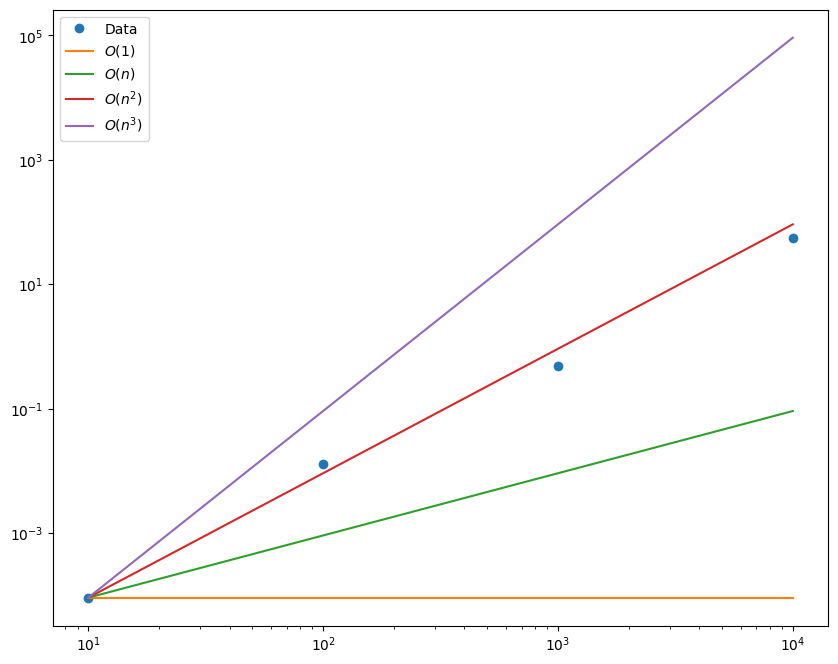

In [32]:
bubble_results=[9.209900008499972e-05, 0.012984600999971008, 0.47854593300007764, 56.28169299499996]

list_sizes=[10,100,1000,10000]

plt.rcParams["figure.figsize"]=(10,8)
plt.loglog(list_sizes, bubble_results,linestyle="None", marker='o',label="Data")
plt.loglog(list_sizes, np.power(list_sizes,0)*bubble_results[0]/10**0,label="$O(1)$")
plt.loglog(list_sizes, np.power(list_sizes,1)*bubble_results[0]/10**1,label="$O(n)$")
plt.loglog(list_sizes, np.power(list_sizes,2)*bubble_results[0]/10**2,label="$O(n^2)$")
plt.loglog(list_sizes, np.power(list_sizes,3)*bubble_results[0]/10**3,label="$O(n^3)$")
plt.legend()

In [33]:
list_sizes

[10, 100, 1000, 10000]

In [37]:
(np.power(list_sizes,2)*bubble_results[0]/10**2) / (np.power(list_sizes,1)*bubble_results[0]/10**1)

array([   1.,   10.,  100., 1000.])

# Insertion Sort

Like bubble sort, the insertion sort is straightforwardish. But unlike bubble sort, it builds the sorted list one element at a time by comparing each item with the rest of the list and inserting it at the correct position.

Translating these words into pseudocode, we have

    insertion_sort(list)
        n = length of list
        for i from 1 to n
            current_elem = list[i]
            j= i-1
            while j >= 0 and list[j] > current_elem
                list[j+1] = list[j]
                j = j - 1
            list[j+1] = current_elem
        return list

In the next cell, try to write a python function called <span STYLE="color:blue">insertion_sort</span> which implements this pseudocode.

* Define a function  <span STYLE="color:blue">insertion_sort</span> which <b>takes in an list</b>, and <b>returns a sorted version</b>.  The body of this function should <b>follow the pseudcode</b> above
* To debug, it may prove useful to <b>print your list at each j-th step</b>, to compare again with the example case below

In [38]:
def insertion_sort(sort_list):
    n = len(sort_list)
    for i in range(0,n):
      current_elem = sort_list[i]
      j = i-1
      while j >= 0 and sort_list[j] > current_elem:
        sort_list[j+1] = sort_list[j]
        j = j - 1
      sort_list[j+1] = current_elem


    return sort_list

To test your code, I've included the same list, such that if necessary you can debug step-by-step. Starting from the list [8,2,6,4,5], the steps of progression are

    [2, 8, 6, 4, 5]
    [2, 6, 8, 4, 5]
    [2, 4, 6, 8, 5]
    [2, 4, 5, 6, 8]

In [40]:
# Generate an list of `list_LENGTH` items consisting
# of random integer values between 0 and 999
arr = [8,2,6,4,5]

# Call the function using the name of the sorting algorithm
# and the list you just created
run_sorting_algorithm(arr,"insertion_sort",3,5)

Algorithm: insertion_sort. Minimum execution time: 1.9456000245554605e-05 seconds


# Measuring Insertion Sort’s Big O Runtime Complexity

Comparing your <span STYLE="color:blue">insertion_sort</span> to <span STYLE="color:blue">bubble_sort</span>, you might think these are dramatically different algorithms.  In fact, like <span STYLE="color:blue">bubble_sort</span>, <span STYLE="color:blue">insertion_sort</span> has two nested loops (one for and one while). Thus, it still has an $O(n^2)$ average runtime complexity.

Although <span STYLE="color:blue">insertion_sort</span> and <span STYLE="color:blue">bubble_sort</span> have the same complexity, in practice, <span STYLE="color:blue">insertion_sort</span> is often more efficient than <span STYLE="color:blue">bubble_sort</span> because within the while loop, fewer average comparsions are required.

Let's test these ideas in practice by running your <span STYLE="color:blue">insertion_sort</span> for some larger lists, to see if we can observe this behavior in the next cell (Hint, you should be able to copy your previous code with a minor change):

* <b>Make a for loop</b> that increments a variable i from 1 to 4
* During the loop, <b>set list length variable to be $10^i$</b>
* <b>Create a list of the length $10^i$</b> whose elements are random integers between 0 and 1000
* Use <span STYLE="color:blue">run_sorting_algorithm</span> with 3 batches of 5 shots
* <b>Copy your times into the "insertion_results" list</b> and check that it also follows $O(n^2)$ scaling
* On the same plot, you should find your original <span STYLE="color:blue">bubble_sort</span> data.  <b>Does one method appear faster or slower than the other?</b>


In [43]:
for i in range(0, 4):
    # set a length of list variable dependent on i
    list_len = 10**i

    #create your list of length 10^i random integers
    rand_list = [randint(0,1000) for i in range(list_len)]
    run_sorting_algorithm(rand_list,"insertion_sort",3,5)
    #Call run_sorting_algorithm


Algorithm: insertion_sort. Minimum execution time: 3.713999831234105e-06 seconds
Algorithm: insertion_sort. Minimum execution time: 3.286299988758401e-05 seconds
Algorithm: insertion_sort. Minimum execution time: 0.0028835789998993278 seconds
Algorithm: insertion_sort. Minimum execution time: 0.2353018339999835 seconds


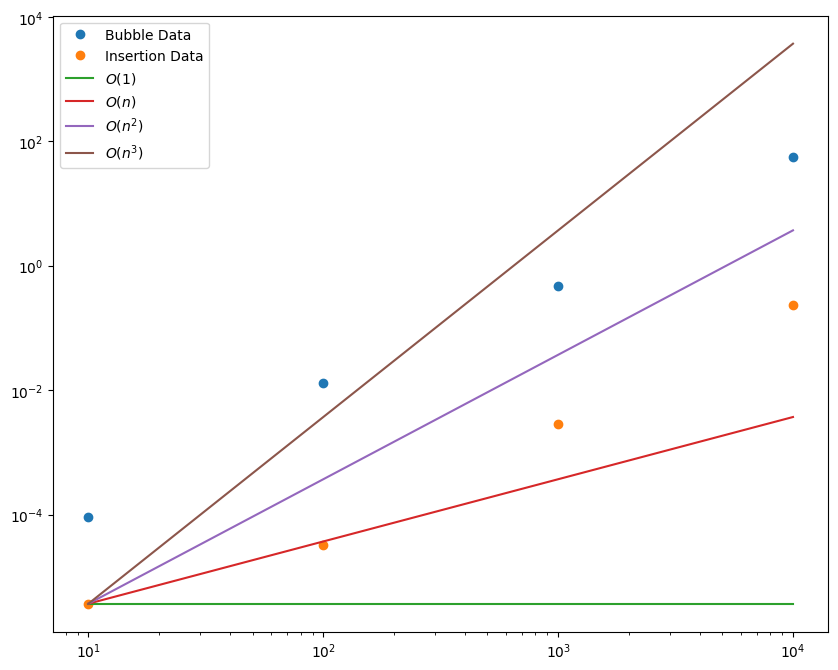

In [44]:
insertion_results=[3.713999831234105e-06, 3.286299988758401e-05, 0.0028835789998993278, 0.2353018339999835]

list_sizes=[10,100,1000,10000]

plt.rcParams["figure.figsize"]=(10,8)
plt.loglog(list_sizes, bubble_results,linestyle="None", marker='o',label="Bubble Data")
plt.loglog(list_sizes, insertion_results,linestyle="None", marker='o',label="Insertion Data")
plt.loglog(list_sizes, np.power(list_sizes,0)*insertion_results[0]/10**0,label="$O(1)$")
plt.loglog(list_sizes, np.power(list_sizes,1)*insertion_results[0]/10**1,label="$O(n)$")
plt.loglog(list_sizes, np.power(list_sizes,2)*insertion_results[0]/10**2,label="$O(n^2)$")
plt.loglog(list_sizes, np.power(list_sizes,3)*insertion_results[0]/10**3,label="$O(n^3)$")
plt.legend()

# The Merge Sort Algorithm in Python

<span STYLE="color:blue">merge_sort</span> is a much more efficient sorting algorithm. It’s based on the <b>divide-and-conquer</b> approach, a powerful algorithmic technique used to solve complex problems.

To properly understand divide and conquer, you should first understand recursion. Recursion breaks a problem down into smaller subproblems until they’re small enough to manage. In programming, recursion is usually expressed by a <b>function calling itself</b>.

Divide-and-conquer algorithms typically follow the same structure:

1. The original input is broken into several parts, each one representing a subproblem that’s similar to the original but simpler.
2. Each subproblem is solved recursively.
3. The solutions to all the subproblems are combined into a single overall solution.

In the case of <span STYLE="color:blue">merge_sort</span>, the divide-and-conquer approach divides the list into two equal-sized parts, sorts each half recursively, and finally merges these two sorted parts into a single sorted list.

# Understanding an Implement of Merge Sort

The implementation of <span STYLE="color:blue">merge_sort</span> needs two different pieces:

1. A function that <b>recursively splits the input in half</b>
2. A function that <b> sorts the halves and recombines them</b>

Here’s the code to merge two different lists:

In [45]:
def merge(left, right):
    # If the first list is empty, then nothing needs
    # to be merged, and you can return the second list as the result
    if len(left) == 0:
        return right

    # If the second list is empty, then nothing needs
    # to be merged, and you can return the first list as the result
    if len(right) == 0:
        return left

    result = []
    index_left = index_right = 0

    # Now go through both lists until all the elements
    # make it into the resultant list
    while len(result) < len(left) + len(right):
        # The elements need to be sorted to add them to the
        # resultant list, so you need to decide whether to get
        # the next element from the first or the second list
        if left[index_left] <= right[index_right]:
            result.append(left[index_left])
            index_left += 1
        else:
            result.append(right[index_right])
            index_right += 1

        # If you reach the end of either list, then you can
        # add the remaining elements from the other list to
        # the result and break the loop
        if index_right == len(right):
            result += left[index_left:]
            break

        if index_left == len(left):
            result += right[index_right:]
            break

    return result

With the above function in place, the other piece is a function that recursively splits the input list in half and uses merge() to produce the final result:

In [46]:
def merge_sort(list):
    # If the input list contains fewer than two elements,
    # then return it as the result of the function
    if len(list) < 2:
        return list

    midpoint = len(list) // 2

    # Sort the list by recursively splitting the input
    # into two equal halves, sorting each half and merging them
    # together into the final result
    return merge(
        left=merge_sort(list[:midpoint]),
        right=merge_sort(list[midpoint:]))

# Measuring Merge Sort’s Big O Complexity

To analyze the complexity of  <span STYLE="color:blue">merge_sort</span>, you should consider the two steps separately:

1. <span STYLE="color:blue">merge()</span> receives two lists whose combined length is at most n, and it combines both lists by looking at each element at most once. This leads to a runtime complexity of $O(n)$.

2. The outer function, <span STYLE="color:blue">merge_sort()</span> splits the input list recursively and calls <span STYLE="color:blue">merge()</span> for each half. Since the list is halved until a single element remains, the total number of halving operations performed by this function is $\log_2(n)$. Since <span STYLE="color:blue">merge()</span> is called for each half, we get a total runtime of $O(n\log_2(n))$.

Interestingly, $O(n\log_2(n))$ is the <b>best</b> possible worst-case runtime that can be achieved by a sorting algorithm.

* Let's run the same analysis of different sized lists for the <span STYLE="color:blue">merge_sort()</span>.
* <b>Copy the results into the "merge_results" list</b> and plot.
* <b>Do the results best agree with an  $O(n\log_2(n))$ scaling?</b> How does it compare to the other two sorting algorithms? Is it always faster? Sometimes?


In [49]:
for i in range(1,5):
    list_LENGTH=10**i

    arr = [randint(0, 1000) for i in range(list_LENGTH)]

    run_sorting_algorithm(arr,"merge_sort",3,5)

Algorithm: merge_sort. Minimum execution time: 0.0001907559999381192 seconds
Algorithm: merge_sort. Minimum execution time: 0.003466954000032274 seconds
Algorithm: merge_sort. Minimum execution time: 0.08182641999974294 seconds
Algorithm: merge_sort. Minimum execution time: 0.303531047999968 seconds


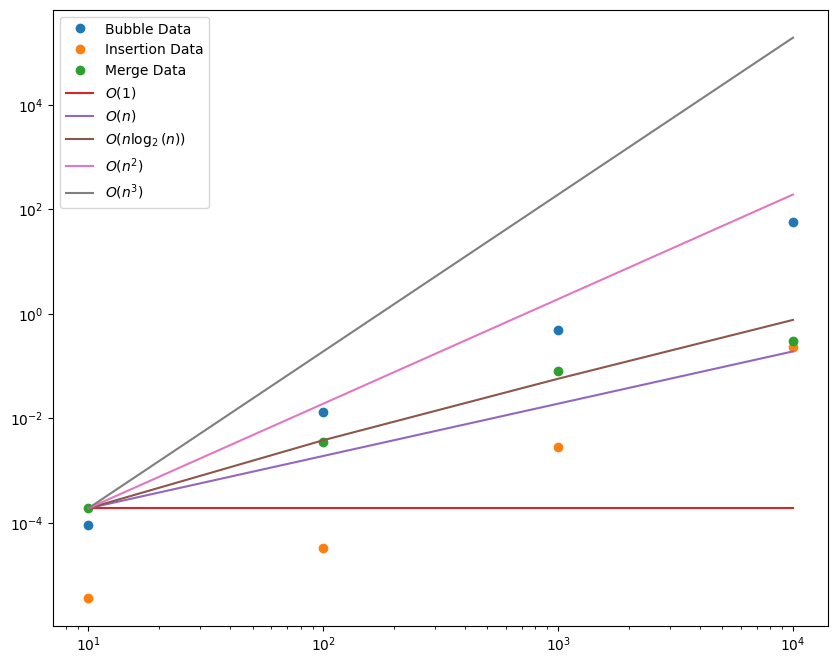

In [51]:
merge_results=[0.0001907559999381192, 0.003466954000032274, 0.08182641999974294, 0.303531047999968]
list_sizes=[10,100,1000,10000]

plt.rcParams["figure.figsize"]=(10,8)
plt.loglog(list_sizes, bubble_results,linestyle="None", marker='o',label="Bubble Data")
plt.loglog(list_sizes, insertion_results,linestyle="None", marker='o',label="Insertion Data")
plt.loglog(list_sizes, merge_results,linestyle="None", marker='o',label="Merge Data")
plt.loglog(list_sizes, np.power(list_sizes,0)*merge_results[0]/10**0,label="$O(1)$")
plt.loglog(list_sizes, np.power(list_sizes,1)*merge_results[0]/10**1,label="$O(n)$")
plt.loglog(list_sizes, np.power(list_sizes,1)*np.log2(list_sizes)*merge_results[0]/(10**1*np.log2(10)),label="$O(n\log_2(n))$")
plt.loglog(list_sizes, np.power(list_sizes,2)*merge_results[0]/10**2,label="$O(n^2)$")
plt.loglog(list_sizes, np.power(list_sizes,3)*merge_results[0]/10**3,label="$O(n^3)$")
plt.legend()